In [5]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')
data = pd.read_csv("data4000.csv")

In [8]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [9]:
data.head()

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
0,57054875.0,2014-08-23,06:10,コンビニエンスストア,616.0,食料品,たばこ,たばこ,たばこ,KOOL MILDS B,1.0,450.0,20000.0,450.0,12034.0,女性,20代,未婚,その他の職業
1,56127093.0,2014-08-01,10:32,コンビニエンスストア,673.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
2,56133844.0,2014-08-01,15:05,薬局・ドラッグストア,725.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
3,56180360.0,2014-08-02,17:10,薬局・ドラッグストア,1302.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主
4,56210002.0,2014-08-03,15:44,薬局・ドラッグストア,651.0,食料品,たばこ,たばこ,たばこ,KENT 6 B,1.0,420.0,20000.0,420.0,41.0,男性,40代,既婚,自営業・個人事業主


In [10]:
data.shape

(4159759, 19)

# カテゴリごとのデータ件数

## cat1におけるデータ件数

In [13]:
cat1_count = data.groupby('cat1').size()
cat1_count

cat1
ヘルスケア      32011
化粧品        47730
日用品雑貨     339360
食料品      3740595
dtype: int64

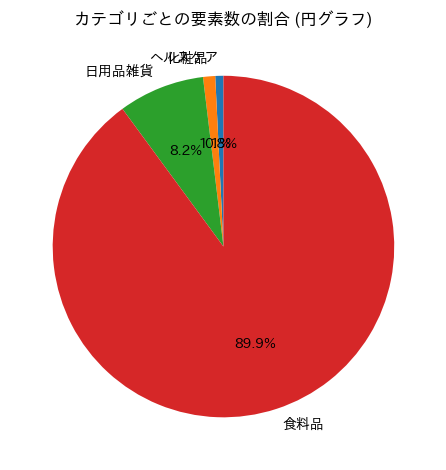

In [14]:
plt.pie(cat1_count, labels=cat1_count.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()


## cat1=食料品のデータカテゴリ

In [16]:
cat1_in_groce = data[data['cat1']=='食料品'].groupby('cat2').size()
cat1_in_groce

cat2
たばこ       57135
主食       604676
加工食品     359619
嗜好品      668943
日配品     1258970
調味料      182924
飲料       608328
dtype: int64

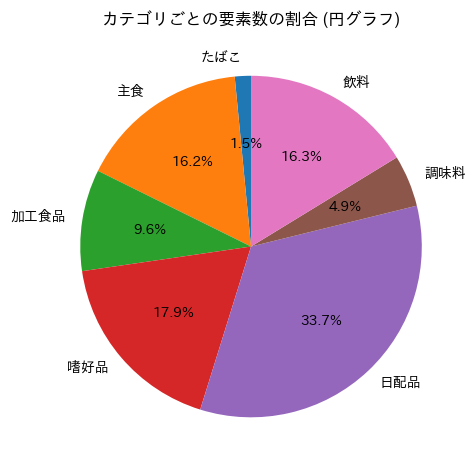

In [17]:
plt.pie(cat1_in_groce, labels=cat1_in_groce.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()


## cat1が食料品のデータの作成

In [19]:
#cat1が食品のデータ
cat1_groce_data = data[data['cat1']=='食料品']


In [20]:
cat1_groce_data["cat4"].unique()

array(['たばこ', 'チ－ズ', 'その他スプレッド類', '畜肉缶詰', 'ミネラルウォ－タ類', 'その他茶', 'キャンディ',
       'チョコレ－ト', ' ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', '香辛料', 'スナック', 'ワイン', '果汁飲料',
       'その他汎用調味料', 'エッセンス類', '砂糖', '紅茶', 'その他飲料', '蜂蜜', 'スポ－ツドリンク',
       'アイスクリ－ム', 'デザ－ト類', 'チュ－インガム', 'コ－ヒ－ドリンク', '紅茶ドリンク', 'ビ－ル', '液体茶',
       'マヨネ－ズ', 'その他酒類', '炭酸飲料', '冷凍調理', '食パン', '揚げ物', '料理酒', '菓子パン・調理パン',
       '牛乳', '焼酎', 'かまぼこ', 'ちくわ', 'サイダ－', 'コ－ラ', '生麺・ゆで麺', 'はんぺん',
       'もずく・めかぶ', '漬物', '洋風食品', '袋インスタント麺', 'ス－プ類', 'ソ－ス', 'マ－ガリン類',
       ' ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 'ヨ－グルト', '魚貝類缶詰', '栄養ドリンク', 'ジャム・ママレ－ド', '煎餅・あられ',
       'つゆ・煮物料理の素', '焼肉ｼｬﾌﾞｼｬﾌﾞのﾀﾚ', 'まぜご飯の素', 'スパゲッティ－', '１００％ジュ－ス',
       '野菜ジユ－ス', '米飯類', '冷凍農産', '畜肉ソ－セ－ジ', '納豆', 'つまみ類', '食酢', 'マカロニ類',
       'パスタソ－ス', 'プレミックス', 'ﾒﾆｭ-専用料理の素', '乾麺', 'ベ－コン', '海苔', '日本茶', '佃煮',
       'その他合わせ調味料', 'ウィスキ－', '豆腐類', 'ゴマ油', 'バタ－', '焼豚', 'ベビ－フ－ド',
       'シチュ－ベ－ス', 'サラダ油・天ぷら油', '味噌汁・吸物類', '中華風食品', '育児用粉ミルク', '削り節',
       '乳酸菌飲料', '醤油', 'カレ－', '豆乳', 'ドレッシング', 'こうや豆腐', 'シリアル類', '乳酸飲料',
       'ﾚｷﾞｭﾗ-ｺ

### 日配品のデータ確認

In [22]:
#食料品のうち日配品のcat3カテゴリ
cat2_nippai_data = cat1_groce_data[cat1_groce_data['cat2']=='日配品']
cat2_nippai_cat = cat1_groce_data[cat1_groce_data['cat2']=='日配品'].groupby('cat3').size()
cat2_nippai_cat

cat3
その他日配品        25981
チルド飲料        138823
ハム・ソーセージ類    100981
冷凍食品         192980
和日配          377253
洋日配          422952
dtype: int64

### 日配品のカテゴリの確認

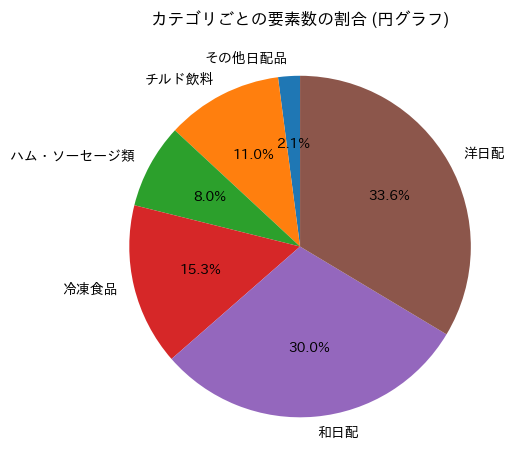

In [24]:
plt.pie(cat2_nippai_cat, labels=cat2_nippai_cat.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()

### 日配品の深掘り

In [26]:
#日配品では、cat4にどのようなカテゴリがあるか
cat2_nippai_data.groupby('cat4').size()

cat4
 ﾎｲｯﾌﾟｸﾘ-ﾑ      4651
かまぼこ           22919
その他冷凍食品         5114
その他練り製品         5871
その他調理食品         5039
その他食品             19
その他麺類            637
ちくわ            24492
はんぺん            4642
もずく・めかぶ         9707
コ－ヒ－ドリンク       16369
チ－ズ            51808
デザ－ト類          53409
トマトジュ－ス          755
バタ－             5619
ベ－コン           14026
マ－ガリン類         10645
ヨ－グルト         136067
中華風食品          20923
乳酸菌飲料          21878
冷凍水産            9296
冷凍調理          155088
冷凍農産           23482
和風食品           11964
揚げ物            20098
果汁飲料            6851
洋風食品           29792
液体茶             2319
焼豚              3216
牛乳            154250
生麺・ゆで麺         70074
畜肉ソ－セ－ジ        50888
畜肉ハム           23174
紅茶ドリンク          6576
納豆             75747
豆乳             15971
豆腐類           130072
野菜ジユ－ス         20386
鍋補完材            1030
魚肉ソ－セ－ジ         9415
魚肉ハム             262
１００％ジュ－ス       24429
dtype: int64

## cat1 != 食料品 のcat2カテゴリ

In [28]:
cat2_not_groce_cat = data[data['cat1']!='食料品'].groupby('cat2').size()
cat2_not_groce_cat

cat2
その他化粧品          414
その他日用品         2806
ハウスホールド      143945
パーソナルケア       92336
ペット用品         33229
ボディ・エチケット     18786
メイクアップ        10192
健康食品           7813
医薬品           24198
基礎化粧品         18338
衛生用品          67044
dtype: int64

### 食料品以外のカテゴリの可視化

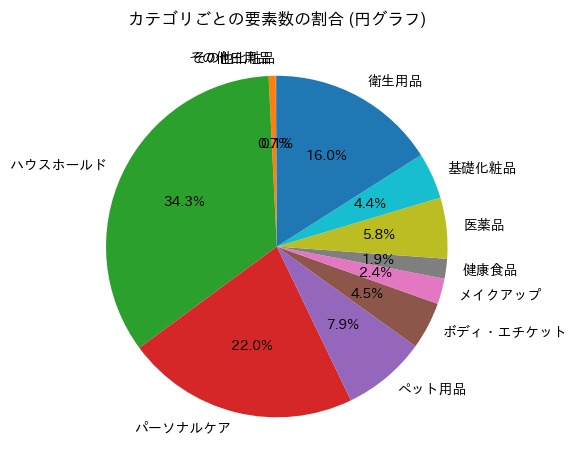

In [30]:
plt.pie(cat2_not_groce_cat, labels=cat2_not_groce_cat.index, autopct='%1.1f%%', startangle=90)
plt.title("カテゴリごとの要素数の割合 (円グラフ)")
plt.tight_layout()
plt.show()

## ユーザーの購買回数の可視化

In [32]:
user_buy_count = data.groupby('id').size()

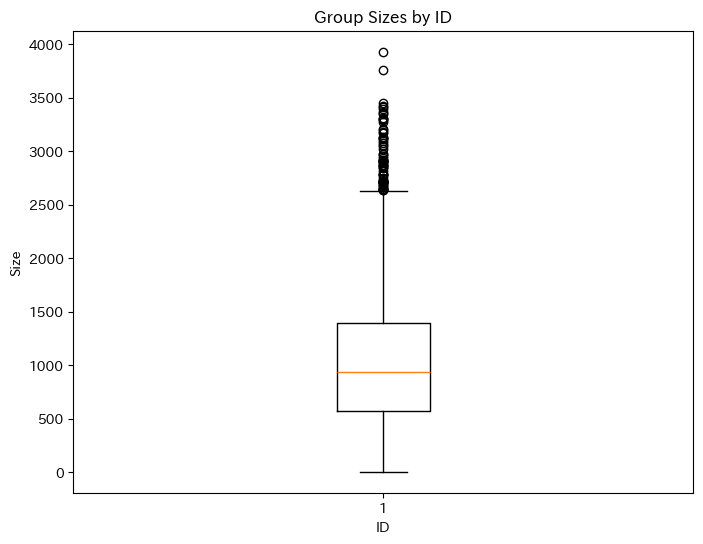

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# グループ化と集計
group_sizes = data.groupby('id').size()

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(group_sizes)
ax.set_title('Group Sizes by ID')
ax.set_xlabel('ID')
ax.set_ylabel('Size')

plt.show()

Text(0, 0.5, 'user_count')

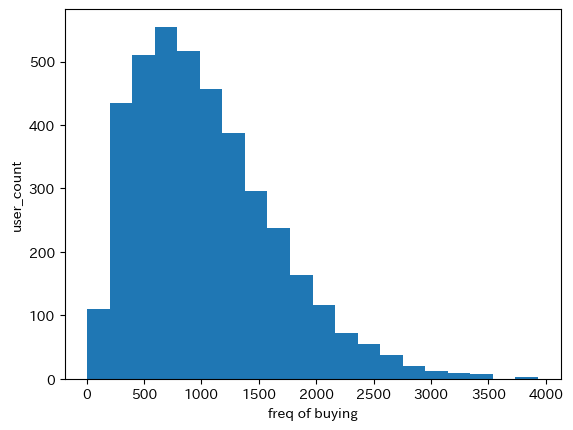

In [34]:
plt.hist(user_buy_count, bins = 20)
plt.xlabel('freq of buying')
plt.ylabel('user_count')

### ユーザーの外れ値の確認

In [36]:
#購買回数が２５００回を超えているユーザーの確認
#ユーザーのレコード数を取得する
data.groupby('id').size()[data.groupby('id').size()>2500].reset_index()

,id,0
0,27.0,2576
1,401.0,3115
2,1121.0,2555
3,1168.0,3363
4,1579.0,2612
...,...,...
92,36671.0,2906
93,37165.0,2850
94,37296.0,2712
95,37782.0,3133


### 平均的な購買ユーザー 購買期間も

1000回以上2500回以上の購買ユーザー

In [39]:
#平均的な購買回数のユーザー
under2500count_user = user_buy_count[user_buy_count<2500 ]

In [40]:
target_user = under2500count_user[1000< under2500count_user]

In [41]:
user_purchase_range = data.groupby('id')['receipt_buydate'].agg(['min', 'max'])

In [42]:
user_purchase_range

,min,max
id,,
1.0,2014-04-02,2015-03-30
16.0,2014-04-02,2015-03-31
23.0,2014-04-03,2015-03-31
27.0,2014-04-01,2015-03-31
40.0,2014-04-02,2015-03-31
...,...,...
40310.0,2014-04-01,2015-03-31
40335.0,2014-04-01,2015-03-25
40341.0,2014-04-01,2015-03-30


In [43]:
user_purchase_range['min'] = pd.to_datetime(user_purchase_range['min'])
user_purchase_range['max'] = pd.to_datetime(user_purchase_range['max'])

In [44]:
purchase_duration = user_purchase_range['max'] - user_purchase_range['min']
purchase_duration.describe()

count                         4000
mean      360 days 15:47:31.200000
std      6 days 02:57:51.515379212
min              192 days 00:00:00
25%              360 days 00:00:00
50%              362 days 00:00:00
75%              364 days 00:00:00
max              364 days 00:00:00
dtype: object

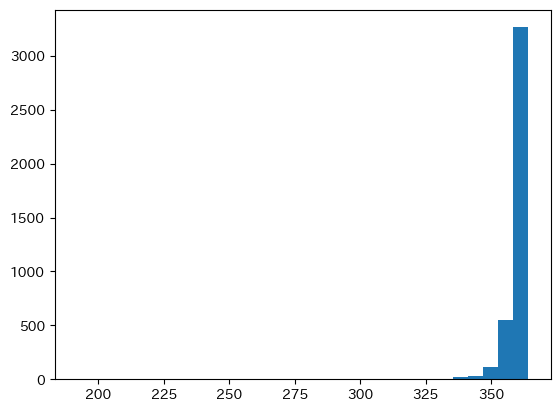

In [45]:
plt.hist(purchase_duration.dt.days, bins=30)
plt.show()

## 対象ユーザーのデータ作成

In [47]:
target_id = target_user.reset_index()['id']
target_data = data[data['id'].isin(target_id)]

In [48]:
#日付データの形式変更
target_data['receipt_buytime'] = pd.to_datetime(target_data['receipt_buytime'])
target_data['receipt_buydate'] = pd.to_datetime(target_data['receipt_buydate'])

C:\Users\nama\AppData\Local\Temp\ipykernel_13992\184921586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['receipt_buytime'] = pd.to_datetime(target_data['receipt_buytime'])
C:\Users\nama\AppData\Local\Temp\ipykernel_13992\184921586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['receipt_buydate'] = pd.to_datetime(target_data['receipt_buydate'])


In [49]:
#年月単位で時間を取得
target_data['receipt_buydate'].dt.to_period("M").unique()

<PeriodArray>
['2014-08', '2014-09', '2014-05', '2014-04', '2014-06', '2014-07', '2014-10',
 '2014-11', '2014-12', '2015-01', '2015-02', '2015-03']
Length: 12, dtype: period[M]

## 対象データの作成

#### cat1のカテゴリを絞っていないデータ

In [52]:
target_data

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
22,56455681.0,2014-08-09,2024-06-21 20:52:00,百貨店・デパート,32000.0,化粧品,基礎化粧品,基礎用,栄養クリ－ム,EL ﾘﾆﾕ-ﾄﾘｲﾌﾞACｸﾘ-ﾑ 48G,1.0,32000.0,48000.0,32000.0,13681.0,女性,60代,既婚,正社員・公務員
24,56382031.0,2014-08-07,2024-06-21 13:54:00,コンビニエンスストア,5055.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
25,56857789.0,2014-08-17,2024-06-21 18:03:00,コンビニエンスストア,5020.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
26,57266047.0,2014-08-29,2024-06-21 16:04:00,コンビニエンスストア,4357.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
29,56737972.0,2014-08-15,2024-06-21 21:15:00,スーパー,1421.0,食料品,日配品,洋日配,チ－ズ,ｸﾗﾌﾄ 100%ﾊﾟﾙﾒｻﾞﾝﾁ-ｽﾞ 80G,1.0,277.0,80000.0,277.0,2660.0,女性,30代,既婚,パート・アルバイト
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159748,57331288.0,2014-08-29,2024-06-21 15:22:00,スーパー,6954.0,NaN,NaN,NaN,NaN,NaN,2.0,172.0,3000.0,86.0,40233.0,女性,40代,既婚,その他の職業
4159749,56585315.0,2014-08-12,2024-06-21 17:55:00,スーパー,976.0,NaN,NaN,NaN,NaN,NaN,1.0,98.0,3000.0,98.0,19556.0,女性,40代,既婚,その他の職業
4159751,56749338.0,2014-08-14,2024-06-21 15:44:00,スーパー,2946.0,NaN,NaN,NaN,NaN,NaN,1.0,92.0,3000.0,92.0,15774.0,女性,50代,既婚,派遣社員
4159752,56746759.0,2014-08-16,2024-06-21 20:29:00,スーパー,3160.0,NaN,NaN,NaN,NaN,NaN,5.0,365.0,2000000.0,73.0,12990.0,女性,40代,既婚,派遣社員


#### 食品カテゴリにしたもの

In [54]:
target_data_food = target_data[target_data['cat1']=='食料品']

In [55]:
target_data_food.shape

(2336563, 19)

In [56]:
target_data_food.head()

,receipt_num,receipt_buydate,receipt_buytime,G_gyoutai_name,receipt_value,cat1,cat2,cat3,cat4,product_name,unit,price,volume,tanka,id,gender,age,married,job
24,56382031.0,2014-08-07,2024-06-21 13:54:00,コンビニエンスストア,5055.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
25,56857789.0,2014-08-17,2024-06-21 18:03:00,コンビニエンスストア,5020.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
26,57266047.0,2014-08-29,2024-06-21 16:04:00,コンビニエンスストア,4357.0,食料品,たばこ,たばこ,たばこ,KENT NANOTEK 1 B10,1.0,4100.0,200000.0,4100.0,6812.0,男性,60代,既婚,派遣社員
29,56737972.0,2014-08-15,2024-06-21 21:15:00,スーパー,1421.0,食料品,日配品,洋日配,チ－ズ,ｸﾗﾌﾄ 100%ﾊﾟﾙﾒｻﾞﾝﾁ-ｽﾞ 80G,1.0,277.0,80000.0,277.0,2660.0,女性,30代,既婚,パート・アルバイト
34,56406632.0,2014-08-07,2024-06-21 09:23:00,コンビニエンスストア,1316.0,食料品,たばこ,たばこ,たばこ,KOOL MILDS B,2.0,900.0,20000.0,450.0,9015.0,女性,30代,既婚,パート・アルバイト


### 年月別ユーザーの購買データ作成

#### 年月別ユーザー数でtime_sliceを作成する

In [59]:
unique_user_count = target_data_food.groupby(target_data_food['receipt_buydate'].dt.to_period("M"))['id'].nunique().reset_index()
unique_user_count.columns = ['receipt_buydate', 'unique_user_count']
unique_user_count.head()

,receipt_buydate,unique_user_count
0,2014-04,1741
1,2014-05,1742
2,2014-06,1742
3,2014-07,1742
4,2014-08,1742


In [60]:
user_time_slice = unique_user_count['unique_user_count'].tolist()
user_time_slice

[1741, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742]

#### ユーザーの年月別の購買商品を取得しリスト化 cat4に対しても同様におこなう

In [62]:
# 年月別とidでグループ化し、product_nameをリストにする
grouped_garm_data = target_data_food.groupby([target_data_food['receipt_buydate'].dt.to_period("M"), 'id'])['product_name'].apply(lambda x: [product.strip() for product in x]).reset_index()


# 年月別とidでグループ化し、product_nameをリストにする
grouped_cat4_data = target_data_food.groupby([target_data_food['receipt_buydate'].dt.to_period("M"), 'id'])['cat4'].apply(lambda x: [product.strip() for product in x]).reset_index()


In [63]:
# 'フメイ'を含むproduct_nameを抽出
filtered_data = target_data_food[target_data_food['product_name'].str.contains('ﾌﾒｲ')]

# 各product_nameの出現回数をカウント
product_count = filtered_data.groupby('product_name').size().reset_index(name='count')

# 結果の表示
product_count


,product_name,count
0,7-11ｼ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ ﾌﾒｲ,1
1,7-11ｼ ｻﾂﾏｱｹﾞ ﾌﾒｲ,4
2,AGF ｿﾉﾀｴｷﾀｲｲｶﾞｲ ｵﾁﾔ ﾌﾒｲ,1
3,AGF RC (ｶﾝｲﾘ) ﾌﾒｲ,1
4,AGF RC (ﾌｸﾛﾊﾟﾂｸ ｺﾅ) ﾌﾒｲ,1
...,...,...
3758,ﾜﾀﾞｶﾝ ﾒﾝﾂﾕ･ﾂﾕﾉﾓﾄ ﾌﾒｲ,3
3759,ﾜﾀﾞﾊﾁ ｶﾏﾎﾞｺ ﾌﾒｲ,1
3760,ﾜﾀﾞﾊﾁ ｻﾂﾏｱｹﾞ ﾌﾒｲ,1
3761,ﾜﾝﾀﾞ- ｷﾔﾝﾃﾞｲ ﾌﾒｲ,2


In [64]:
filtered_data.shape

(161937, 19)

In [65]:
target_data_food.groupby("product_name").size().reset_index()

,product_name,0
0,ﾐﾐﾏﾃﾞﾔﾜﾗｶｵｲｼｲｼﾖｸﾊﾟﾝ 6ﾏｲ,1
1,0KCALｶﾝﾃﾝｾﾞﾘ-ｸﾞﾚ-ﾌﾟF 250G,21
2,0KCALｾﾞﾘ-ﾌﾙ-ﾂｱｿ-ﾄ 14GX42,3
3,0ｶﾛﾘ- ｿ-ﾀﾞｶﾁﾜﾘｺｵﾘ H 100ML,2
4,0ｶﾛﾘ-ｾﾞﾘ- ﾏｽｶﾂﾄｱｼﾞ 23GX8,3
...,...,...
112228,ﾜﾝﾜﾝｼ ｻﾂｸﾘｻﾗﾀﾞ 150G,7
112229,ﾜﾝﾜﾝｼ ｻﾗﾀﾞｾﾝ 90G,1
112230,ﾜﾝﾜﾝｼ ﾐﾆﾌﾟﾚﾂﾂｴﾙｻﾗﾀﾞ 100G,1
112231,ﾜﾝﾜﾝｼ ﾕｷﾓﾁ ｻﾗﾀﾞｱｼﾞ 24ﾏｲ,36


In [66]:
target_data_food.shape

(2336563, 19)

In [67]:
# user_product_ym = grouped_garm_data['product_name'].tolist()
user_product_ym = grouped_cat4_data['cat4'].tolist()

## DTMのデータ準備

In [69]:
from gensim import corpora, models

#### 商品名の辞書作成

In [71]:
#texts = target_data['G_gyoutai_name'].tolist()
#対象データを製品名からcat4に変更する
#texts = target_data_food['product_name'].tolist()

texts = target_data_food['cat4'].tolist()
#processed_docs = [[doc.lower()] for doc in texts]
#floatに対する変換でエラーが出るためそれに対する対応
processed_docs = [[str(doc).lower().strip()] for doc in texts]

In [72]:
processed_docs

[['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['チ－ズ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['畜肉缶詰'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['ミネラルウォ－タ類'],
 ['キャンディ'],
 ['たばこ'],
 ['たばこ'],
 ['チョコレ－ト'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['スナック'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['ワイン'],
 ['ワイン'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['果汁飲料'],
 ['その他スプレッド類'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['その他汎用調味料'],
 ['その他汎用調味料'],
 ['その他汎用調味料'],
 ['スナック'],
 ['ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-'],
 ['エッセンス類'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['チ－ズ'],
 ['砂糖'],
 ['ワイン'],
 ['紅茶'],
 ['その他飲料'],
 ['その他飲料'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['たばこ'],
 ['スナック'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['チョコレ－ト'],
 ['チョコレ－ト'],
 ['アイスクリ－ム'],
 ['デザ－ト類'],
 ['デザ－ト類'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['スポ－ツドリンク'],
 ['デザ－ト類'],
 ['デザ－ト類'],
 ['チュ－インガム'],
 ['アイスクリ－ム'],
 ['アイスク

In [73]:
#食料品の対象商品数
len(target_data_food['product_name'].unique())

112233

In [74]:
#食料品の対象商品数
len(target_data_food['cat4'].unique())

160

In [75]:
dictionary = corpora.Dictionary(processed_docs)

In [76]:
#内容確認
dictionary.token2id

{'たばこ': 0,
 'チ－ズ': 1,
 '畜肉缶詰': 2,
 'ミネラルウォ－タ類': 3,
 'キャンディ': 4,
 'チョコレ－ト': 5,
 'ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-': 6,
 'スナック': 7,
 'ワイン': 8,
 '果汁飲料': 9,
 'その他スプレッド類': 10,
 'その他汎用調味料': 11,
 'エッセンス類': 12,
 '砂糖': 13,
 '紅茶': 14,
 'その他飲料': 15,
 'スポ－ツドリンク': 16,
 'アイスクリ－ム': 17,
 'デザ－ト類': 18,
 'チュ－インガム': 19,
 'コ－ヒ－ドリンク': 20,
 '紅茶ドリンク': 21,
 'ビ－ル': 22,
 'その他酒類': 23,
 '炭酸飲料': 24,
 '液体茶': 25,
 '冷凍調理': 26,
 '食パン': 27,
 'マヨネ－ズ': 28,
 '揚げ物': 29,
 '料理酒': 30,
 '菓子パン・調理パン': 31,
 '牛乳': 32,
 '焼酎': 33,
 'ちくわ': 34,
 'サイダ－': 35,
 'はんぺん': 36,
 'かまぼこ': 37,
 'もずく・めかぶ': 38,
 '漬物': 39,
 '洋風食品': 40,
 '袋インスタント麺': 41,
 'ソ－ス': 42,
 '生麺・ゆで麺': 43,
 'マ－ガリン類': 44,
 'ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺': 45,
 '香辛料': 46,
 'ヨ－グルト': 47,
 '魚貝類缶詰': 48,
 '栄養ドリンク': 49,
 '煎餅・あられ': 50,
 'つゆ・煮物料理の素': 51,
 'スパゲッティ－': 52,
 '１００％ジュ－ス': 53,
 'まぜご飯の素': 54,
 '冷凍農産': 55,
 '畜肉ソ－セ－ジ': 56,
 '納豆': 57,
 'つまみ類': 58,
 '食酢': 59,
 'マカロニ類': 60,
 'パスタソ－ス': 61,
 '焼肉ｼｬﾌﾞｼｬﾌﾞのﾀﾚ': 62,
 'プレミックス': 63,
 '乾麺': 64,
 'ベ－コン': 65,
 '日本茶': 66,
 '海苔': 67,
 '佃煮': 68,
 'その他合わせ調味料': 69,
 'ウィスキ－': 70,
 '豆腐類'

#### 年月別ユーザー別のコーパス作成

In [78]:
corpus = [dictionary.doc2bow(doc) for doc in user_product_ym]

In [79]:
corpus

[[(0, 6),
  (4, 1),
  (6, 5),
  (7, 3),
  (13, 1),
  (16, 3),
  (17, 4),
  (18, 1),
  (20, 22),
  (21, 1),
  (24, 1),
  (25, 2),
  (27, 3),
  (28, 1),
  (31, 23),
  (32, 14),
  (34, 2),
  (35, 1),
  (37, 1),
  (39, 1),
  (40, 1),
  (43, 7),
  (45, 2),
  (46, 1),
  (50, 4),
  (51, 1),
  (56, 2),
  (57, 4),
  (61, 2),
  (65, 1),
  (69, 1),
  (71, 3),
  (75, 3),
  (76, 7),
  (78, 1),
  (80, 3),
  (81, 3),
  (83, 1),
  (84, 2),
  (94, 1),
  (99, 1),
  (111, 1),
  (116, 2),
  (131, 1),
  (156, 1)],
 [(4, 2),
  (5, 2),
  (6, 3),
  (7, 7),
  (13, 1),
  (17, 2),
  (26, 1),
  (27, 4),
  (29, 1),
  (31, 1),
  (32, 7),
  (33, 1),
  (34, 4),
  (39, 5),
  (40, 1),
  (41, 1),
  (43, 1),
  (45, 1),
  (46, 2),
  (47, 4),
  (57, 2),
  (62, 1),
  (68, 1),
  (71, 8),
  (76, 3),
  (84, 1),
  (100, 4),
  (108, 1),
  (109, 1),
  (116, 1),
  (138, 1)],
 [(1, 1),
  (3, 2),
  (5, 1),
  (6, 1),
  (8, 3),
  (10, 1),
  (15, 1),
  (17, 1),
  (22, 3),
  (23, 1),
  (26, 5),
  (27, 4),
  (31, 1),
  (32, 1),
  (34, 1)

In [80]:
user_time_slice

[1741, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742, 1742]

In [81]:
len(user_time_slice)

12

In [82]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [83]:
from gensim.models import LdaSeqModel

In [84]:
# LDAモデルのトレーニング
#from gensim.models import LdaSeqModel
num_topics = 5
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=user_time_slice, num_topics=num_topics)

C:\Users\nama\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [85]:
# ある時点のトピックを取得
topics_at_time_t = ldaseq.print_topics(time=0)  # timeパラメータで時点を指定
print(topics_at_time_t)

[[('スナック', 0.12509539783058726), ('チョコレ－ト', 0.0889873661528388), ('アイスクリ－ム', 0.0839651840291007), ('ﾋﾞｽｹﾂﾄ&ｸﾗﾂｶ-', 0.05348303657386988), ('キャンディ', 0.05181248407258968), ('煎餅・あられ', 0.04165161283255275), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.039444157850527774), ('冷凍調理', 0.033774472171752286), ('デザ－ト類', 0.03317934353006639), ('炭酸飲料', 0.02801707975021497), ('牛乳', 0.02540599854790048), ('ヨ－グルト', 0.020756749756105215), ('果汁飲料', 0.020124271952798322), ('食パン', 0.016534239007411022), ('コ－ラ', 0.01496818462705661), ('スポ－ツドリンク', 0.013784120383763714), ('１００％ジュ－ス', 0.012820680862611445), ('菓子パン・調理パン', 0.011165465303522328), ('カレ－', 0.011092949917996359), ('その他飲料', 0.01075855753412069)], [('菓子パン・調理パン', 0.5409606936369161), ('食パン', 0.055445999498506024), ('ヨ－グルト', 0.03760435282694363), ('牛乳', 0.03653128312875903), ('ｶｯﾌﾟｲﾝｽﾀﾝﾄ麺', 0.03487726317675639), ('紅茶ドリンク', 0.016099222463254917), ('デザ－ト類', 0.014299392840177172), ('液体茶', 0.014137457729299491), ('コ－ヒ－ドリンク', 0.012930793017804344), ('アイスクリ－ム', 0.012084437133158503), (

In [86]:
# モデルの保存
ldaseq.save('dtm_d_user_w_cat4_5.pkl')

In [87]:
# LDAモデルのトレーニング
#from gensim.models import LdaSeqModel
num_topics = 10
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=user_time_slice, num_topics=num_topics)

C:\Users\nama\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [88]:
# モデルの保存
ldaseq.save('dtm_d_user_w_cat4_10.pkl')

In [89]:
# LDAモデルのトレーニング
#from gensim.models import LdaSeqModel
num_topics = 7
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=user_time_slice, num_topics=num_topics)

C:\Users\nama\anaconda3\Lib\site-packages\gensim\models\ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)


In [90]:
# モデルの保存
ldaseq.save('dtm_d_user_w_cat4_7.pkl')

In [91]:
# モデルの読み込み
ldaseq_gyoutai = LdaSeqModel.load('ldaseq_model_gyoutai_3.pkl')
#ldaseq = LdaSeqModel.load('/content/drive/MyDrive/2年授業共有フォルダ/dtm/ldaseq_model_cat4_5.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'ldaseq_model_gyoutai_3.pkl'

## topicの可視化

In [ ]:
len(target_data['G_gyoutai_name'].unique())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
corpus

In [ ]:
#特定のトピックにおける、各構成要素の推移
ldaseq.print_topic_times(topic=2)

In [ ]:
len(corpus)

In [ ]:
corpus[20903 - 1]

In [ ]:
cumulative_list = [sum(user_time_slice[:i+1]) for i in range(len(user_time_slice))]
print(cumulative_list)

In [ ]:
#時系列でのトピックの確率を取得
for time in range(len(user_time_slice)):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic_prob in enumerate(topics_at_time_t):
        print(topic_id, topic_prob[0:5])


In [ ]:
# トピックの割合を計算
import numpy as np

time_topic_prob = {}
start = 0
for num, index in enumerate(cumulative_list):
    # 各トピックの確率を効率的に平均化
    topic_probs = np.mean(ldaseq.doc_topics(range(start,index)), axis = 0)

    # 結果を格納
    time_topic_prob[num] = topic_probs

    # 次の時間帯の開始点を更新
    start = index

In [ ]:
time_topic_prob

In [ ]:
times_ = list(target_data['receipt_buydate'].dt.to_period("M").unique())

In [ ]:
len(times_)

In [ ]:
times_ = [str(str_time) for str_time in times_]

In [ ]:
num_topic = 5
# データの準備
data = time_topic_prob

# データを時間とトピック別に整理
times = list(data.keys())
topic_prob_data = [[data[t][s] for t in times] for s in range(num_topic)]
for i in range(num_topic):
    plt.plot(times_, topic_prob_data[i],label=f'Topic{i}')
# グラフのスタイリング
plt.xlabel('Time (Document ID)', fontsize=12)
plt.ylabel('Topic Proportion', fontsize=12)
plt.title('Topic Evolution Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0 [('ﾂｹﾓﾉ                ﾌﾒｲ', 0.06045537434980597), ('ﾌﾒｲ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.05396234171781695), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.026487915119890782), ('ｿﾉﾀ ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ     ﾌﾒｲ', 0.018647925353346275), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ｽｲｻﾝﾋﾝ  ﾌﾒｲ', 0.012225623756016669)]

1 [('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 6ﾏｲ', 0.01731317864891303), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ 6ﾏｲ', 0.01629566977312406), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.012634379329042971), ('ﾔﾏｻﾞｷ ﾎｳｼﾞﾕﾝ 8ﾏｲ', 0.010139654620876395), ('ﾔﾏｻﾞｷ ﾌﾝﾜﾘｼﾖｸﾊﾟﾝ(8)', 0.007871394809506655)]

2 [('ｿﾉﾀ ﾄｳﾌ(ﾓﾒﾝ)          ﾌﾒｲ', 0.0634195052068427), ('ｿﾉﾀ ﾄｳﾌ(ｷﾇ)           ﾌﾒｲ', 0.046431218336921806), ('ﾂｹﾓﾉ                ﾌﾒｲ', 0.02618763649309471), ('ｿﾉﾀ ﾚｲﾄｳｼﾖｸﾋﾝ･ﾁﾖｳﾘﾋﾝ  ﾌﾒｲ', 0.02347240012969625), ('ｿﾉﾀ ｱﾌﾞﾗｱｹﾞ           ﾌﾒｲ', 0.014450112359799231)]

3 [('ﾌｼﾞﾊﾟ ﾎﾝｼﾞｺﾐｼﾖｸﾊﾟﾝ    6ﾏｲ', 0.030378659466324166), ('ﾔﾏｻﾞｷ ｵｲｼｻﾀﾞﾖﾘ 6ﾏｲ', 0.01884109790383519), ('ﾘﾖ-ﾕ- ｶｼﾊﾟﾝ･ﾁﾖｳﾘﾊﾟﾝ   ﾌﾒｲ', 0.018720313372965123), ('ﾂﾏﾐﾙｲ               ﾌﾒｲ', 0.011955154553617045), ('ｿﾉﾀ ｺﾒ                ﾌﾒｲ', 0.010501717164208349)]

4 [('ﾔﾏｻﾞｷ ﾏﾙｺﾞﾄｿ-ｾ-ｼﾞ 1ｺ', 0.01556052294085652), ('ﾔﾏｻﾞｷｺﾂﾍﾟﾊﾟﾝﾏ-ｶﾞﾘﾝ&ｼﾞﾔﾑ1ｺ', 0.012296666974206213), ('ﾔﾏｻﾞｷ ﾎﾂｶｲﾄﾞｳﾁ-ｽﾞﾑｼｹ-ｷ 1ｺ', 0.011404809539074313), ('ﾔﾏｻﾞｷ ﾗﾝﾁﾊﾟﾂｸﾋﾟ-ﾅﾂ 2ｺ', 0.011170840667807219), ('ﾔﾏｻﾞｷ ｺﾂﾍﾟﾂﾌﾞｱﾝ&ﾏ-ｶﾞﾘﾝ 1ｺ', 0.010518677255398012)]


In [ ]:
data

In [ ]:
doc = ldaseq.doc_topics(2602727) # check the 558th document in the corpuses topic distribution
print (doc)


In [ ]:
#特定のドキュメントがどのクラスタに属するかを判別したもの
for token_idx in range(len(corpus)):
    doc = ldaseq.doc_topics(token_idx) # check the 558th document in the corpuses topic distribution
    print (doc)


In [ ]:
# # 各トピックの時間ごとの重みを格納する配列を初期化
# num_topics = 10
# num_time_slices = 12
# topic_weights = np.zeros((num_topics, num_time_slices))
# # 各時点でのトピックの重みを取得
# for time in range(num_time_slices):
#     topics_at_time_t = ldaseq.print_topics(time=time)
#     #print(topics_at_time_t)
#     for topic_id, topic in enumerate(topics_at_time_t):
#         # トピックの重み（例えば、トピックの確率）を抽出して配列に格納
#         topic_weights[topic_id, time] = sum(prob for word, prob in topic)
#         topic_cont = [token for token, _ in topic]
#         print(f'{topic_id}:{topic_cont}')
#         #print(f'{topic_id}:{len(topic_cont)}')

In [ ]:
# topic_weights

In [ ]:
for time in range(num_time_slices):
    topics_at_time_t = ldaseq.print_topics(time=time)
    for topic_id, topic in enumerate(topics_at_time_t):
        # トピックの重み（例えば、トピックの確率）を抽出して配列に格納
        print(topic_id, topic)
        #topic_weights[topic_id, time] = sum(prob for word, prob in topic)
        #print(topic, id, sum(prob for word, prob in topic))